In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(20,10)

In [2]:
#read the csv dataset
df=pd.read_csv('TransactionSamples.csv')
df.head()

,gT,sId,rId,sAcc,rAcc,TranAmount,TranType,TranStatus,sBalbefore,sBalAfter,...,sf4,sTD,rTD,sAccID,ef1,ef2,NoDescription,TranTS,sType,rType
0,N-RegDep,PN_Ret2,PN_EU_0_261,RAcc2,EUAcc0_261,131926.49,Dt,SU,1.000000e+09,9.998681e+08,...,NaN,1/6/2011 0:11:22,1/6/2011 0:11:22,RAcc2,NaN,NaN,Dp201161.01111,1/6/2011 0:11:22,RET,EU
1,N_Reg_RC,PN_EU_1_502,operator,EUAcc1_502,A0,2054.46,ArRC,SU,1.000000e+08,9.999795e+07,...,NaN,1/6/2011 0:16:8,1/6/2011 0:16:8,EUAcc1_502,NaN,NaN,Rc201161.01616,1/6/2011 0:16:8,EU,operator
2,N-RegDep,PN_Ret2,PN_EU_1_362,RAcc2,EUAcc1_362,182548.74,Dt,SU,9.998681e+08,9.996855e+08,...,NaN,1/6/2011 0:36:47,1/6/2011 0:36:47,RAcc2,NaN,NaN,Dp201161.03636,1/6/2011 0:36:47,RET,EU
3,N_Reg_RC,PN_EU_1_26,operator,EUAcc1_26,A0,5507.28,ArRC,SU,1.000000e+08,9.999449e+07,...,NaN,1/6/2011 0:36:59,1/6/2011 0:36:59,EUAcc1_26,NaN,NaN,Rc201161.03636,1/6/2011 0:36:59,EU,operator
4,N_Reg_RC,PN_EU_1_18,operator,EUAcc1_18,A0,2102.60,ArRC,SU,1.000000e+08,9.999790e+07,...,NaN,1/6/2011 1:1:26,1/6/2011 1:1:26,EUAcc1_18,NaN,NaN,Rc201161.111,1/6/2011 1:1:26,EU,operator


In [3]:
#Check the basic characteristics of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54222 entries, 0 to 54221
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gT             54222 non-null  object 
 1   sId            54222 non-null  object 
 2   rId            54222 non-null  object 
 3   sAcc           54222 non-null  object 
 4   rAcc           54222 non-null  object 
 5   TranAmount     54222 non-null  float64
 6   TranType       54222 non-null  object 
 7   TranStatus     54222 non-null  object 
 8   sBalbefore     54222 non-null  float64
 9   sBalAfter      54222 non-null  float64
 10  rBalBefore     54222 non-null  float64
 11  rBalAfter      54222 non-null  float64
 12  sf1            54222 non-null  bool   
 13  sf2            54222 non-null  bool   
 14  sf3            0 non-null      float64
 15  sf4            0 non-null      float64
 16  sTD            54222 non-null  object 
 17  rTD            54222 non-null  object 
 18  sAccID

In [4]:
#it is observed that service field 3,4 and empty fields 1 and 2 has no values.
#Except that there are no missing values

#column 3 and 18 have same values

#So drop the empty columns and  columns with duplicate data.
columns = ['sf3', 'sf4', 'ef1', 'ef2', 'sAccID','NoDescription']
df.drop(columns, inplace=True, axis=1)
data = df

In [5]:
#get the new information about the cleaned dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54222 entries, 0 to 54221
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gT          54222 non-null  object 
 1   sId         54222 non-null  object 
 2   rId         54222 non-null  object 
 3   sAcc        54222 non-null  object 
 4   rAcc        54222 non-null  object 
 5   TranAmount  54222 non-null  float64
 6   TranType    54222 non-null  object 
 7   TranStatus  54222 non-null  object 
 8   sBalbefore  54222 non-null  float64
 9   sBalAfter   54222 non-null  float64
 10  rBalBefore  54222 non-null  float64
 11  rBalAfter   54222 non-null  float64
 12  sf1         54222 non-null  bool   
 13  sf2         54222 non-null  bool   
 14  sTD         54222 non-null  object 
 15  rTD         54222 non-null  object 
 16  TranTS      54222 non-null  object 
 17  sType       54222 non-null  object 
 18  rType       54222 non-null  object 
dtypes: bool(2), float64(5), o

In [6]:
#export the cleaned data as a new dataset in CSV format
data.to_csv('processedData1.csv',index=False)

In [7]:
df2=np.transpose(data)
df2

,0,1,2,3,4,5,6,7,8,9,...,54212,54213,54214,54215,54216,54217,54218,54219,54220,54221
gT,N-RegDep,N_Reg_RC,N-RegDep,N_Reg_RC,N_Reg_RC,N_Reg_RC,N_Reg_RC,N-RegC2C,N_RegWith,N-RegDep,...,N-RegDep,N_Reg_RC,N_Reg_RC,N_Reg_RC,N_Reg_RC,N_Reg_RC,N_Reg_RC,N-RegDep,N-RegC2C,N-RegDep
sId,PN_Ret2,PN_EU_1_502,PN_Ret2,PN_EU_1_26,PN_EU_1_18,PN_EU_0_786,PN_EU_0_597,PN_EU_2_5,PN_EU_1_131,PN_Ret3,...,PN_Ret4,PN_EU_0_1203,PN_EU_0_1221,PN_EU_0_414,PN_EU_1_467,PN_EU_0_116,PN_EU_0_1256,PN_Ret6,PN_EU_1_197,PN_Ret5
rId,PN_EU_0_261,operator,PN_EU_1_362,operator,operator,operator,operator,PN_EU_1_121,PN_Ret6,PN_EU_2_86,...,PN_EU_1_171,operator,operator,operator,operator,operator,operator,PN_EU_1_143,PN_EU_2_85,PN_EU_1_360
sAcc,RAcc2,EUAcc1_502,RAcc2,EUAcc1_26,EUAcc1_18,EUAcc0_786,EUAcc0_597,EUAcc2_5,EUAcc1_131,RAcc3,...,RAcc4,EUAcc0_1203,EUAcc0_1221,EUAcc0_414,EUAcc1_467,EUAcc0_116,EUAcc0_1256,RAcc6,EUAcc1_197,RAcc5
rAcc,EUAcc0_261,A0,EUAcc1_362,A0,A0,A0,A0,EUAcc1_121,RAcc6,EUAcc2_86,...,EUAcc1_171,A0,A0,A0,A0,A0,A0,EUAcc1_143,EUAcc2_85,EUAcc1_360
TranAmount,131926,2054.46,182549,5507.28,2102.6,1361.77,6265.82,66197.3,314644,100475,...,104825,3193.5,5162.4,1500.92,1738.73,524.7,2106.86,213241,199432,87364.8
TranType,Dt,ArRC,Dt,ArRC,ArRC,ArRC,ArRC,Ind,Wl,Dt,...,Dt,ArRC,ArRC,ArRC,ArRC,ArRC,ArRC,Dt,Ind,Dt
TranStatus,SU,SU,SU,SU,SU,SU,SU,SU,SU,SU,...,SU,SU,SU,SU,SU,SU,SU,SU,SU,SU
sBalbefore,1e+09,1e+08,9.99868e+08,1e+08,1e+08,1e+08,1e+08,1e+08,1e+08,1e+09,...,8.47699e+08,1.00099e+08,1.00179e+08,9.99815e+07,1.00493e+08,9.99983e+07,9.99849e+07,8.78513e+08,9.75558e+07,9.06682e+08
sBalAfter,9.99868e+08,9.99979e+07,9.99686e+08,9.99945e+07,9.99979e+07,9.99986e+07,9.99937e+07,9.99331e+07,9.96822e+07,9.999e+08,...,8.47594e+08,1.00096e+08,1.00174e+08,9.998e+07,1.00491e+08,9.99978e+07,9.99828e+07,8.78299e+08,9.73543e+07,9.06595e+08


# Ananlysis of Categorical Features to know the behaviour of transactions

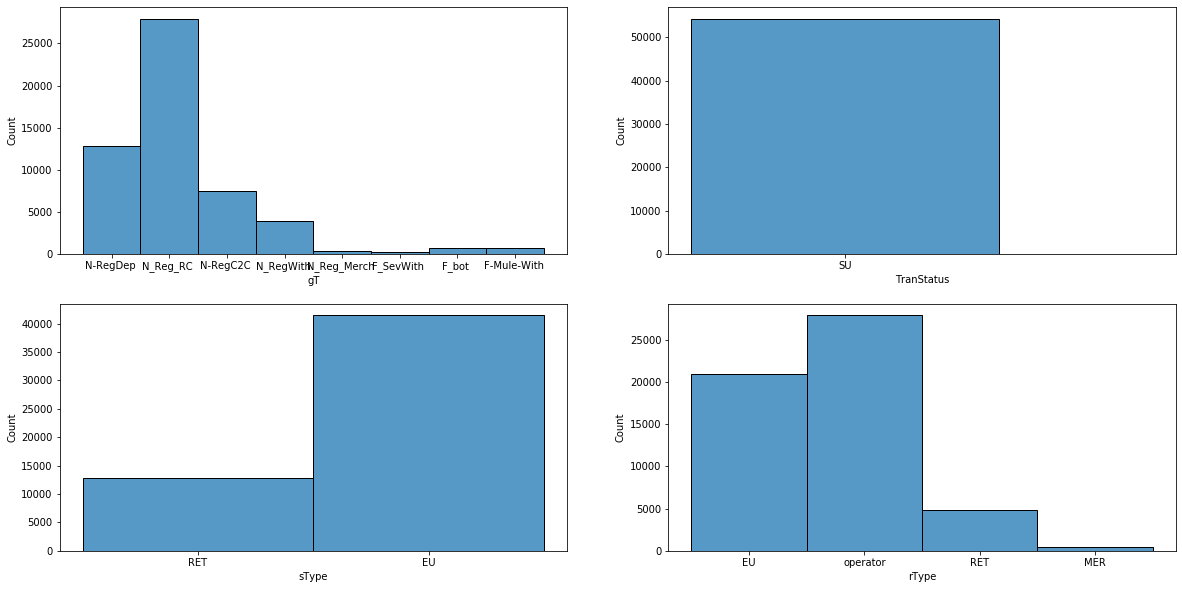

In [9]:
cols=['gT','TranStatus','sType','rType']


for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    col=cols[i]
    sns.histplot(df[col])

In [10]:
for i in range(len(cols)):
    col=cols[i]
    values=df[col].value_counts()
    print("\n",values)


 N_Reg_RC        27901
N-RegDep        12784
N-RegC2C         7504
N_RegWith        3899
F_bot             731
F-Mule-With       729
N_Reg_Merch       442
F_SevWith         232
Name: gT, dtype: int64

 SU    54222
Name: TranStatus, dtype: int64

 EU     41438
RET    12784
Name: sType, dtype: int64

 operator    27901
EU          21019
RET          4860
MER           442
Name: rType, dtype: int64
